# STABILITY(3 points possible)

In [12]:
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family']='serif'
rcParams['font.size']=16
def linearconv(nx):
    dx=0.2
    nt=20
    dt=.025
    c=4
    x=numpy.linspace(0,4,nx)
    u=numpy.ones(nx)
    lbound=numpy.where(x >= 0.5)
    ubound=numpy.where(x <=1)
    u[numpy.intersect1d(lbound, ubound)]=2
    un=numpy.ones(nx)

    for n in range(nt):
        un=u.copy()
        u[1:]=un[1:]-c*dt/dx*(un[1:]-un[0:-1])
        u[0]=1.0
    pyplot.plot(x, u, color='#003366', ls="--", lw=3)
    pyplot.ylim(0,2.5)

# SYMPY

In [13]:
import numpy
import sympy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family']='serif'
rcParams['font.size']=16

In [14]:
from sympy import init_printing
init_printing()

In [15]:
x=sympy.symbols('x')

In [16]:
x

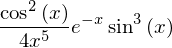

In [17]:
F=(sympy.sin(x)**3)*(sympy.cos(x)**2)/(4*x**5*sympy.exp(x))
F

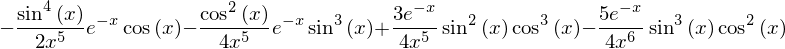

In [18]:
dF=F.diff(x)
dF

In [19]:
from sympy.utilities.lambdify import lambdify

print(dF)

-exp(-x)*sin(x)**4*cos(x)/(2*x**5) - exp(-x)*sin(x)**3*cos(x)**2/(4*x**5) + 3*exp(-x)*sin(x)**2*cos(x)**3/(4*x**5) - 5*exp(-x)*sin(x)**3*cos(x)**2/(4*x**6)


In [20]:
dF_lamb = lambdify((x), dF)
print("The value of u at x=2.2 is {}." .format(dF_lamb(2.2)))

The value of u at x=2.2 is -0.00026648912670920613.


# Traffic flow

In [12]:
import numpy
import sympy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family']='serif'
rcParams['font.size']=16
from sympy import init_printing
init_printing()
from sympy.utilities.lambdify import lambdify

In [13]:
p, Pmax, Vmax = sympy.symbols('p Pmax Vmax')


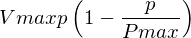

In [14]:
F = Vmax*p*(1-p/Pmax)
F

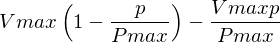

In [15]:
dF=F.diff(p)
dF

In [16]:
#set initial parameters
Vmax = 80    #m/s
L = 11   #m
nx = 51
dx = L/(nx-1)
Pmax = 250  #cars/m

dt = 0.001    #length of time step s
nt = 50    #set time range s
x = numpy.linspace(0, L, nx)
rho0 = numpy.ones(nx)*10
rho0[10:20] = 50
print(rho0)
p = rho0
print(p)

[ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  50.  50.  50.  50.  50.
  50.  50.  50.  50.  50.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.
  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.
  10.  10.  10.  10.  10.  10.]
[ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  50.  50.  50.  50.  50.
  50.  50.  50.  50.  50.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.
  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.
  10.  10.  10.  10.  10.  10.]


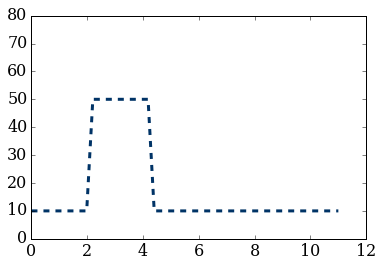

In [17]:
pyplot.plot(x, p, color='#003366', ls='--', lw=3)
pyplot.ylim(0,80)

In [18]:
for n in range (1, nt):
    pn=p.copy()
    for i in range (1, nx):
        
        p[i]=pn[i]+(2*pn[i]*Vmax/Pmax-Vmax)*(pn[i]-pn[i-1])*dt/dx

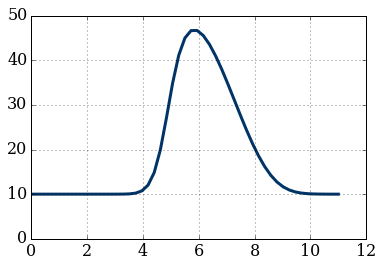

In [37]:
pyplot.plot(x, p, color='#003366', lw=3)
pyplot.ylim (0, 50)
pyplot.grid()

In [32]:
pmax=max(p)
pmax

In [29]:
v=Vmax*(1-p/Pmax)

In [30]:
AverageV = numpy.mean(v)/3.6

In [31]:
AverageV

In [34]:
Vmin=Vmax*(1-pmax/Pmax)
Vmin/3.6

# minimun velocity at time t=6 minutes

In [40]:
#set initial parameters
Vmax = 80    #m/s
L = 11   #m
nx = 51
dx = L/(nx-1)
Pmax = 250  #cars/m

dt = 0.001    #length of time step s
t=0.1         #6min=0.1 hour
nt = int(t/dt)    #set time range s
x = numpy.linspace(0, L, nx)
rho0 = numpy.ones(nx)*10
rho0[10:20] = 50
print(rho0)
p = rho0
print(p)

[ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  50.  50.  50.  50.  50.
  50.  50.  50.  50.  50.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.
  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.
  10.  10.  10.  10.  10.  10.]
[ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  50.  50.  50.  50.  50.
  50.  50.  50.  50.  50.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.
  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.
  10.  10.  10.  10.  10.  10.]


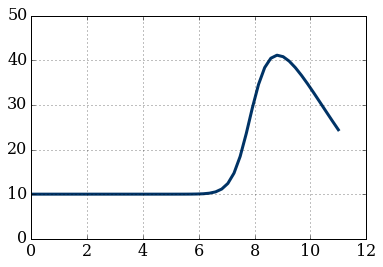

In [41]:
for n in range (1, nt):
    pn=p.copy()
    for i in range (1, nx):
        
        p[i]=pn[i]+(2*pn[i]*Vmax/Pmax-Vmax)*(pn[i]-pn[i-1])*dt/dx
pyplot.plot(x, p, color='#003366', lw=3)
pyplot.ylim (0, 50)
pyplot.grid()

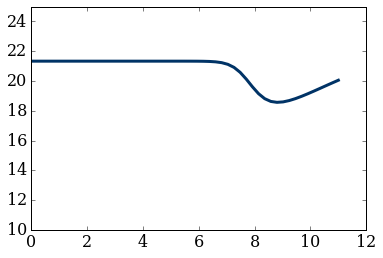

In [49]:
V6=Vmax*(1-p/Pmax)/3.6
pyplot.plot(x, V6, color='#003366', lw=3)
pyplot.ylim(10, 25)

In [50]:
V6min=min(V6)
V6min

# condition 2

In [53]:
#set initial parameters
Vmax = 136    #m/s
L = 11   #m
nx = 51
dx = L/(nx-1)
Pmax = 250  #cars/m

dt = 0.001    #length of time step s
t=0.05        #6min=0.1 hour
nt = int(t/dt)    #set time range s
x = numpy.linspace(0, L, nx)
rho0 = numpy.ones(nx)*20
rho0[10:20] = 50
print(rho0)
p = rho0
print(p)

[ 20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  50.  50.  50.  50.  50.
  50.  50.  50.  50.  50.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.
  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.
  20.  20.  20.  20.  20.  20.]
[ 20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  50.  50.  50.  50.  50.
  50.  50.  50.  50.  50.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.
  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.
  20.  20.  20.  20.  20.  20.]


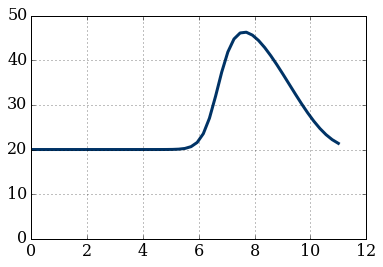

In [54]:
for n in range (1, nt):
    pn=p.copy()
    for i in range (1, nx):
        
        p[i]=pn[i]+(2*pn[i]*Vmax/Pmax-Vmax)*(pn[i]-pn[i-1])*dt/dx
pyplot.plot(x, p, color='#003366', lw=3)
pyplot.ylim (0, 50)
pyplot.grid()

In [55]:
pmax=max(p)
pmax

In [56]:
Vmin=Vmax*(1-pmax/Pmax)
Vmin/3.6

In [57]:
v=Vmax*(1-p/Pmax)
AverageV2 = numpy.mean(v)/3.6

In [58]:
AverageV2

In [61]:
Vmin2=numpy.min(v)/3.6

In [62]:
Vmin2